

#  TIME-SERIES FORECASTING (TSF) DL


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Miles Travelled | Time Series Forecasting  (TSF)

Dataset Source:
- https://www.kaggle.com/datasets/bulentsiyah/for-simple-exercises-time-series-forecasting

## Exploring Data

In [ ]:
data = pd.read_csv('miles_traveled.csv')
data.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


<Axes: >

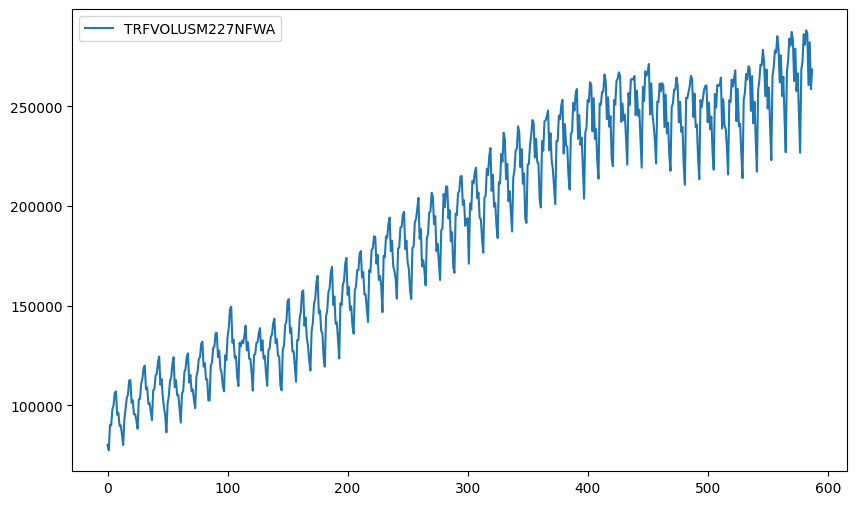

In [ ]:
data.plot(figsize=(10,6))

## Pre-processing Data

### Manipulating Time-series Data

In [ ]:
data.set_index('DATE', inplace=True)

In [ ]:
data.index.freq = 'MS'

In [ ]:
data.rename(columns={'TRFVOLUSM227NFWA': 'MILES'}, inplace=True)

In [ ]:
data

,MILES
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2018-08-01,286608.0
2018-09-01,260595.0
2018-10-01,282174.0


## Splitting Data

In [ ]:
data.shape

(588, 1)

In [ ]:
train = data.iloc[:len(data)-12]
test =  data.iloc[:len(data)-12]

In [ ]:
train

,MILES
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2017-08-01,283184.0
2017-09-01,262673.0
2017-10-01,278937.0


In [ ]:
test

,MILES
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2017-08-01,283184.0
2017-09-01,262673.0
2017-10-01,278937.0


## Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_train = scaler.fit_transform(train)
df_train

array([[0.0130109 ],
       [0.        ],
       [0.06089061],
       [0.05961858],
       [0.09780801],
       [0.10763646],
       [0.13792216],
       [0.14067108],
       [0.08485905],
       [0.08992334],
       [0.05832273],
       [0.0594042 ],
       [0.03760821],
       [0.01274887],
       [0.07399679],
       [0.09844641],
       [0.12488268],
       [0.13335334],
       [0.16685961],
       [0.16769811],
       [0.11361547],
       [0.11949919],
       [0.08629306],
       [0.0861025 ],
       [0.07157184],
       [0.05159575],
       [0.12140962],
       [0.12289603],
       [0.15961334],
       [0.17066617],
       [0.19605433],
       [0.20233825],
       [0.14592594],
       [0.14958957],
       [0.11123816],
       [0.11242443],
       [0.09157651],
       [0.07205778],
       [0.1431532 ],
       [0.14615462],
       [0.17806966],
       [0.18302438],
       [0.21078032],
       [0.22383886],
       [0.15669292],
       [0.16982768],
       [0.12834146],
       [0.102

In [ ]:
df_test = scaler.transform(test)
df_test

array([[0.0130109 ],
       [0.        ],
       [0.06089061],
       [0.05961858],
       [0.09780801],
       [0.10763646],
       [0.13792216],
       [0.14067108],
       [0.08485905],
       [0.08992334],
       [0.05832273],
       [0.0594042 ],
       [0.03760821],
       [0.01274887],
       [0.07399679],
       [0.09844641],
       [0.12488268],
       [0.13335334],
       [0.16685961],
       [0.16769811],
       [0.11361547],
       [0.11949919],
       [0.08629306],
       [0.0861025 ],
       [0.07157184],
       [0.05159575],
       [0.12140962],
       [0.12289603],
       [0.15961334],
       [0.17066617],
       [0.19605433],
       [0.20233825],
       [0.14592594],
       [0.14958957],
       [0.11123816],
       [0.11242443],
       [0.09157651],
       [0.07205778],
       [0.1431532 ],
       [0.14615462],
       [0.17806966],
       [0.18302438],
       [0.21078032],
       [0.22383886],
       [0.15669292],
       [0.16982768],
       [0.12834146],
       [0.102

## Time-series Generator

In [ ]:
n_input = 12
n_features = 1

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
generator = TimeseriesGenerator(df_train, df_train, length=n_input, batch_size=1)

In [ ]:
len(generator)

564

In [ ]:
len(df_train)

576

In [ ]:
df_train[:13]

array([[0.0130109 ],
       [0.        ],
       [0.06089061],
       [0.05961858],
       [0.09780801],
       [0.10763646],
       [0.13792216],
       [0.14067108],
       [0.08485905],
       [0.08992334],
       [0.05832273],
       [0.0594042 ],
       [0.03760821]])

In [ ]:
generator[0]

(array([[[0.0130109 ],
         [0.        ],
         [0.06089061],
         [0.05961858],
         [0.09780801],
         [0.10763646],
         [0.13792216],
         [0.14067108],
         [0.08485905],
         [0.08992334],
         [0.05832273],
         [0.0594042 ]]]),
 array([[0.03760821]]))

In [ ]:
generator[0][0].shape

(1, 12, 1)

## Model Training & Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
model = Sequential(
    [(LSTM(50,activation='relu',input_shape=(n_input,n_features))),(Dense(1))]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(generator,epochs=30)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0616
Epoch 2/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0061
Epoch 3/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0056
Epoch 4/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0041
Epoch 5/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0033
Epoch 6/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0027
Epoch 7/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0017
Epoch 8/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0012
Epoch 9/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0013
Epoch 10/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0011
Epoch 11/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0012
Epoch 12/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0011
Epoch 13/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0010
Epoch 14/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.9075e-04
Epoch 15/30
564/564 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.8

## Model Evaluation

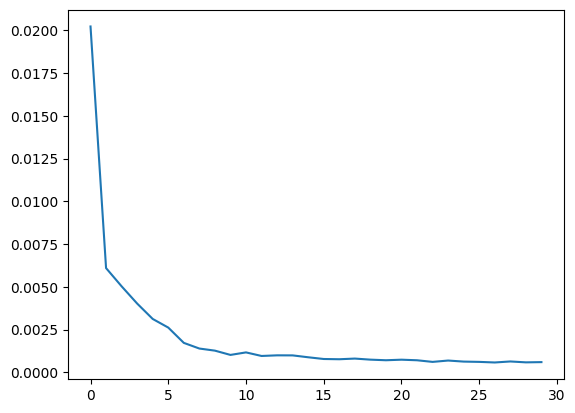

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Model Prediction

In [ ]:
df_train[-n_input:]

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [ ]:
first_eval_batch = df_train[-n_input:]

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


array([[0.79023904]], dtype=float32)

## Model Deployment

In [ ]:
model.save('miles_model.keras')

In [ ]:
from keras.models import load_model

In [ ]:
from keras.models import load_model
loaded = load_model('miles_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
loaded.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


array([[0.79023904]], dtype=float32)